# Card Abstraction Visualization
Background: I first went through `abstraction_exploration.ipynb` to better understand how many clusters I should be using for K-Means clustering, concluding that 100 clusters per game stage was a good number using the elbow method.

Using `abstraction.py`, I then randomly generated 100,000 hands per game stage (flop/turn/river), and then generated the clusters on this data using K-Means Clustering using the euclidean distance, which are found in the `data/clusters` folder. 

Now, in this notebook, I attempt to visualize the clusters generated.

In [18]:
import joblib
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../src')

# Flop Visualization

In [4]:
flop_kmeans = joblib.load('../kmeans_data/kmeans/flop/kmeans_1719903872_samples=10000_bins=10.joblib')
flop_raw_data = np.load('../kmeans_data/distributions/flop/1719903872_samples=10000_bins=10.npy')
flop_cards = np.load('../kmeans_data/cards/flop/1719903872_samples=10000_bins=10.npy')

In [5]:
# Convert histograms to EHS
ehs_flop_raw_data = (flop_raw_data * np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])).sum(axis=1)

In [6]:
kmeans = flop_kmeans
assert(len(kmeans.cluster_centers_) == 50)
flop_kmeans_centroids = kmeans.cluster_centers_

flop_raw_data_classes = kmeans.predict(flop_raw_data)
flop_raw_data_classes

array([ 5, 25, 38, ..., 39, 25,  9], dtype=int32)

In [19]:
from abstraction import calculate_equity_distribution

Loading KMeans Flop Classifier kmeans_1719903872_samples=10000_bins=10.joblib
Loading KMeans Turn Classifier kmeans_1719904417_samples=10000_bins=10.joblib


<BarContainer object of 10 artists>

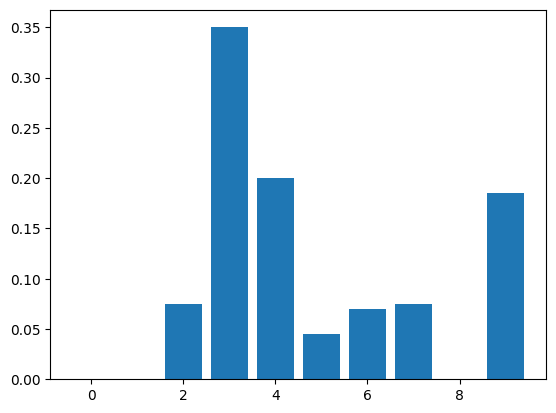

In [27]:
cards = '7s 9s 8h 3c Ts'
# cards = '6s 3s 8h 5s Js'
plt.bar([i for i in range(10)], calculate_equity_distribution(cards.split(' ')[:2], cards.split(' ')[2:]))

<BarContainer object of 10 artists>

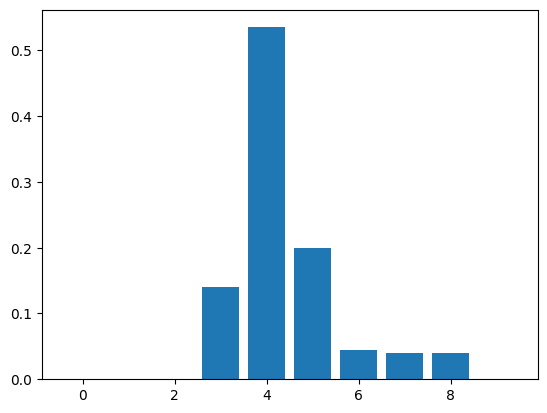

In [31]:
cards = 'Ah 7s Qc 3h 5s'
plt.bar([i for i in range(10)], calculate_equity_distribution(cards.split(' ')[:2], cards.split(' ')[2:]))

In [16]:
# Very drawy kind of hands
flop_cards[np.where(flop_raw_data_classes == 32)]

array(['7s 9s 8h 3c Ts', '6s 3s 8h 5s Js', '8h 5d 6h Qh 4h',
       '5s 7s 2s Ts 4c', '2s 9s 8s 5s 4d', '3d 8d Qh 5d 9d',
       'Jd 5d 7c 6h 4d', 'Js 3s Ks Tc 9c', '9s 8s Tc 5s 3s',
       '9h Th 3s 8c 7c', '8s 9c Js 4d Td', 'Td 9c 4c 7c 8s',
       '8s 9h Qs Td 6h', '3c 8c 6c 2c Ah', '8c 6s 7s 5d 5c',
       '6c 9c 4c Td 3c', '8d Ks 6s 4h 5h', '6c Ts 5c 7h 8s',
       'Jd 6c 4c 3c 5d', '5s 6s Ac Ts 3s', '8s 6s 9h 7h Ks',
       '5s 3s 2c 4s 9s', '8s 7s Td Ah 9h', 'Td 7s 9s 5d 8d',
       '8d 7h 5d 9d Js', '5c 9c Jc 2s 3c', '7c 2c 6d 8c 4c',
       '6d Td Ad 8h 7c', '7c Ts 9s 3d 8c', 'Jc 9h 6c 8s Td',
       '9h Ts 8d 6c Jd', 'Td 6s 7d 4d 3d', '6c Jd 9c 8s Th',
       '8s 3s 7s Qs 5h', '2s 4s Ts As 3h', '5h 4h Ah 2d 7h',
       '8h 2h 4h 9s Qh', '7c 9h 4c Ts 8c', '7s Td 6s 8d Ad',
       'Th 4d 9c Js 8h', '8s 4s Jh 6s 2s', '8c 9s Jc 7d 6c',
       '9s Jc 5c Tc 7s', '7c 6c 3c 9d 2c', '8c 9s 6c 7s Js',
       '7d 4d 9c 5d 9d', 'Ts 8s 6d Jd 9h', '6h 8c 9d 7h Jh',
       '5s 9d 8s 7s Jc',

In [13]:
# Pocket 2s, Ace high kind of hands, no draws
flop_cards[np.where(flop_raw_data_classes == 33)]

array(['Ah 7s Qc 3h 5s', '5d Ac Ks 3s Td', '2h 2c Jd Kh 6h',
       '6d As Tc Qh 4d', 'Qd 8h Ks As 3h', 'Kc 2d Qd Ad 3h',
       'Kc 5d 6h Ac 7s', 'Ac 5d Qc 6s 2h', '2c 2h 7h 6d 6s',
       'Kd 4c 5h 8s 5c', '3h Ks 4h 5c Ah', '2c 2s Ks 8c Qc',
       'Ah 4c 3s 6d Jc', '3c 3h 8d 9c 4s', '3d 3h 7s Ac 6h',
       '6d Ac 5s 2c Jh', 'Ac 8d Qc 9h 4d', 'Kd Td 2s 2h 4h',
       'Kh 9c 3d 8s Ah', 'Ac 9s 4c Ks 8h', '2c 2s 7d 7c 5s',
       'Ah 5d 6c Qs 8d', '2d Kh 6d 6c 4s', 'Js Ks 4h Tc 9h',
       '7c Js Ah 8s 8c', '8h Qc Kc As 4d', 'Ah 8d 2h Qd 3c',
       '5d 2s 5h 7h Ah', 'Kd 8s 6d 4s 4h', '3h 3c 5h 8s Th',
       '9s Jc 5c 7c Qc', '2c 2h Tc 5d Ad', 'Qd 9d 7c Jc Kh',
       '4c 4h 9c Ah Ts', 'Jc Ah 2d 9h 5s', 'Qs Ac 3s 8d 9d',
       'As 2s Kd Th 5c', 'Td Kc Qs 2h 9h', '3c Ah 6d Jc 5c',
       '4d As Qd 7d 6s', '9c 2c 2d 6s 4s', 'Kh 4d 3d 7c 3c',
       '8h Ac 2c 3d Ks', 'As 2h 5d 3c Qs', '3s 3d Qd 9s 7d',
       'Ad 9h Qs 3h 5d', '6d Ah Kc 5s Qh', '4s 4d 9h 5s Td',
       '6c Ad 7c 9s Th',

The raw data is 10 dimensional, so we first run PCA to reduce this data down to 3 dimensions.

In [ ]:
from sklearn.decomposition import PCA
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd

In [ ]:
pca_3d = PCA(n_components=3) # 3D vizualization

In [ ]:
PCs_3d = pca_3d.fit_transform(flop_raw_data)
PCs_3d_centroids = pca_3d.fit_transform(flop_kmeans_centroids)

In [ ]:
df = pd.DataFrame(PCs_3d, columns=['dim1', 'dim2', 'dim3'])
df_centoids = pd.DataFrame(PCs_3d_centroids, columns=['dim1', 'dim2', 'dim3'])


In [ ]:
marker_text = []
for i, card_string in enumerate(flop_cards):
	cards = card_string.split(' ')
	assert(len(cards) == 5)
	marker_text.append(f'Player Cards: {cards[:2]}, Community Cards: {cards[2:]}, Class: {flop_raw_data_classes[i]}, EHS: {ehs_flop_raw_data[i]:.2f}')
marker_text[:5]

["Player Cards: ['Qc', 'Qs'], Community Cards: ['Qd', 'Kh', 'Td'], Class: 5, EHS: 0.88",
 "Player Cards: ['9c', 'Jh'], Community Cards: ['8h', '2s', '6h'], Class: 25, EHS: 0.39",
 "Player Cards: ['5d', 'Th'], Community Cards: ['3s', '6s', '9c'], Class: 38, EHS: 0.28",
 "Player Cards: ['7h', '9h'], Community Cards: ['8s', '4s', '9c'], Class: 7, EHS: 0.75",
 "Player Cards: ['8d', 'Js'], Community Cards: ['Ts', '3d', '2s'], Class: 40, EHS: 0.39"]

In [ ]:
""" TODO:
- Add Title
- Animate rotation https://community.plotly.com/t/how-to-animate-a-rotation-of-a-3d-plot/20974
"""

' TODO:\n- Add Title\n- Animate rotation https://community.plotly.com/t/how-to-animate-a-rotation-of-a-3d-plot/20974\n'

In [ ]:
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=PCs_3d[:, 0], y=PCs_3d[:,1], z=PCs_3d[:,2],
                        hovertemplate='<b>%{text}</b><extra></extra>',
                        text=marker_text,
                        marker=dict(
                            size=2,
                            color=flop_raw_data_classes
                        ),
                        mode='markers',
))
fig.update_layout(title=dict(text=f"Flop Abstraction ({flop_kmeans_centroids.shape[0]} Clusters)", font=dict(size=28)), title_x=0.5, scene=dict(
                  xaxis_title="Dimension 1",
                  yaxis_title="Dimension 2",
                  zaxis_title="Dimension 3")
)
# fig.show()
fig.show(renderer='browser')

# Turn Visualization
Same steps as for flop.

In [ ]:
kmeans_turn = joblib.load('../kmeans_data/kmeans/turn/kmeans_1719904417_samples=10000_bins=10.joblib')
raw_data = np.load('../kmeans_data/distributions/turn/1719904417_samples=10000_bins=10.npy')
cards = np.load('../kmeans_data/cards/turn/1719904417_samples=10000_bins=10.npy')

# Convert histograms to EHS
ehs_raw_data = (raw_data * np.array([0.05, 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95])).sum(axis=1)

kmeans = kmeans_turn
raw_data_classes = kmeans.predict(raw_data)
kmeans_centroids = kmeans.cluster_centers_

pca_3d = PCA(n_components=3) # 3D vizualization
PCs_3d = pca_3d.fit_transform(raw_data)
PCs_3d_centroids = pca_3d.fit_transform(kmeans_centroids)

df = pd.DataFrame(PCs_3d, columns=['dim1', 'dim2', 'dim3'])
df_centoids = pd.DataFrame(PCs_3d_centroids, columns=['dim1', 'dim2', 'dim3'])

marker_text = []
for i, card_string in enumerate(cards):
	cards = card_string.split(' ')
	assert(len(cards) == 6)
	marker_text.append(f'Player Cards: {cards[:2]}, Community Cards: {cards[2:]}, Class: {raw_data_classes[i]}, EHS: {ehs_raw_data[i]:.2f}')

# # https://stackoverflow.com/questions/61227248/plotly-how-to-create-custom-hover-labels-for-plotly-3d-scatter-figures
fig = go.Figure()
fig.add_trace(go.Scatter3d(x=PCs_3d[:, 0], y=PCs_3d[:,1], z=PCs_3d[:,2],
                        hovertemplate='<b>%{text}</b><extra></extra>',
                        text=marker_text,
                        marker=dict(
                            size=2,
                            color=raw_data_classes
                        ),
                        mode='markers'
))

fig.update_layout(title=dict(text=f"Turn Abstraction ({kmeans_centroids.shape[0]} Clusters)", font=dict(size=28)), title_x=0.5, scene=dict(
                  xaxis_title="Dimension 1",
                  yaxis_title="Dimension 2",
                  zaxis_title="Dimension 3")
)
# fig.show()
fig.show(renderer='browser')